# Exploration et Prétraitement des Données - Détection de Fraude

Ce notebook présente l'exploration et le prétraitement du dataset de transactions bancaires pour la détection de fraude.

## 1. Chargement des données

In [2]:
import pandas as pd

df = pd.read_csv('../data/creditcard.csv')
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [3]:
df.info()
df.describe()
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

✅ **Résultat** : Aucune donnée manquante détectée dans le dataset.

In [5]:
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

## 2. Analyse de la Distribution des Classes

📊 **Distribution des classes** :
- **Transactions normales** : 99.83%
- **Transactions frauduleuses** : 0.17%

⚠️ **Déséquilibre important** : Le dataset présente un déséquilibre de classes très marqué, typique des problèmes de détection de fraude.

<Axes: >

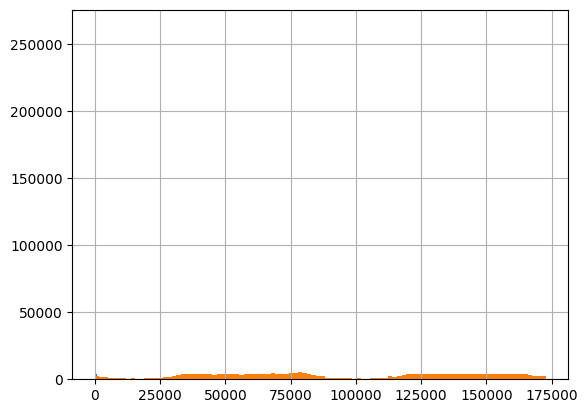

In [7]:
import matplotlib.pyplot as plt

df['Amount'].hist(bins=100)
df['Time'].hist(bins=100)

## 3. Visualisation des Distributions

📈 **Analyse des distributions** :
- Les variables `Amount` et `Time` présentent des distributions très asymétriques
- Normalisation nécessaire pour améliorer les performances des modèles

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

<Axes: >

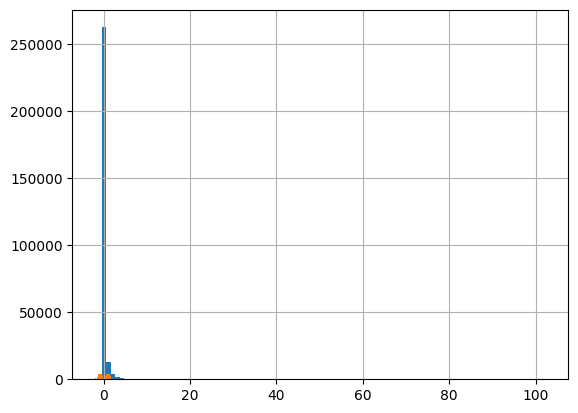

In [10]:
df['Amount'].hist(bins=100)
df['Time'].hist(bins=100)

In [11]:
# Sauvegarde du dataset prétraité
df.to_csv('../data/cleaned_creditcard.csv', index=False)
print('✅ Dataset prétraité sauvegardé avec succès !')